In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
pwd

'/content'

In [8]:
ls

gdrive/  sample_data/


In [9]:
cd /content/gdrive/MyDrive/ANN/test/

/content/gdrive/MyDrive/ANN/test


In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/ANN/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/ANN/Val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2100 files belonging to 2 classes.
Found 506 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

# Print training and validation accuracy after each epoch
for epoch in range(5):
    train_accuracy = history.history['accuracy'][epoch]
    val_accuracy = history.history['val_accuracy'][epoch]
    print(f"Epoch {epoch + 1}: Train accuracy = {train_accuracy:.4f}, Validation accuracy = {val_accuracy:.4f}")


Epoch 1/5
66/66 [==============================] - 510s 7s/step - loss: 0.0280 - accuracy: 0.9890 - val_loss: 174.9592 - val_accuracy: 0.6462
Epoch 2/5
66/66 [==============================] - 432s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 320.5638 - val_accuracy: 0.6462
Epoch 3/5
66/66 [==============================] - 445s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 398.9614 - val_accuracy: 0.6462
Epoch 4/5
66/66 [==============================] - 440s 7s/step - loss: 2.0169 - accuracy: 0.9919 - val_loss: 45.9620 - val_accuracy: 0.6976
Epoch 5/5
66/66 [==============================] - ETA: 0s - loss: 1.8120e-04 - accuracy: 1.0000

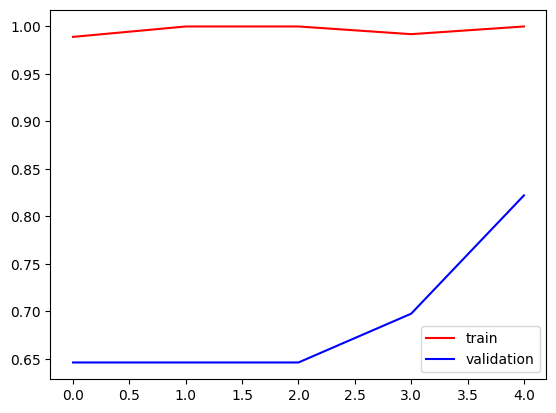

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

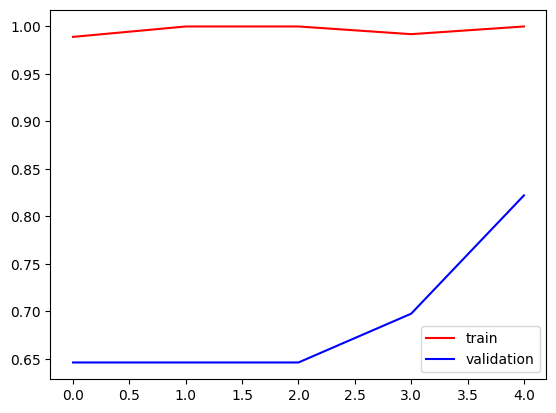

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

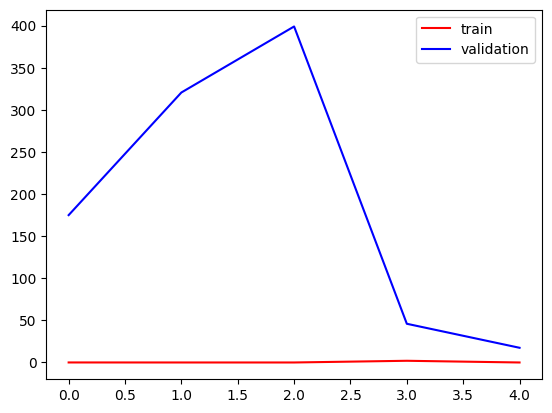

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [39]:
test_img = cv2.imread('/content/gdrive/MyDrive/ANN/test/Real_DMaps/real (1).png')

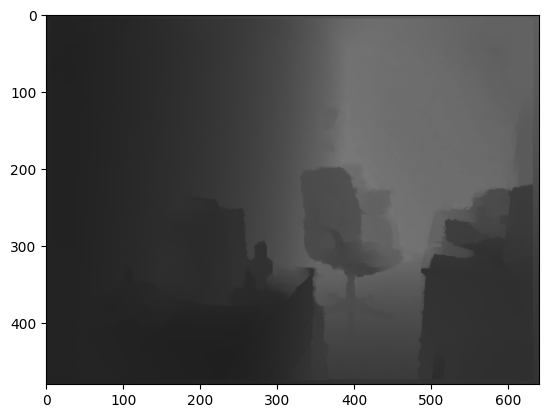

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(480, 640, 3)

In [42]:
test_img = cv2.resize(test_img,(256,256))



In [37]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 63ms/step


array([[1.]], dtype=float32)